# **Effective Model**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from MTI_Second_Order import FMTI2_NeumannBC, Change_Basis, Block_Reverse

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]

## **Channel Decomposition** 

We decompose the averaged induced pairing $\overline{\Delta}_{ind} (z)$ over a basis of 16 matrices that generates the whole space made by the outer product of spin $\sigma = \uparrow, \downarrow$ and orbital $\lambda=\pm$.
The $4 \times 4$ matrix can be decomposed as
$$
    \overline{\Delta}_{ind} (z) = \sum_A f_A (z) \Lambda_A \,,
$$
where the coefficients of the expansion can be computed through
$$
    f_A (z) = 
    \frac{ \text{Tr}\left( \Lambda_A^\dagger \, \Delta_{ind} (z)  \right) }
    { \text{Tr}\left( \Lambda_A^\dagger \, \Lambda_A  \right) }
$$and $\{ \Lambda_A \}$ is a basis of 16 matrices that generates the whole space.


For the sake of simplicity, we choose as basis in spin and orbital spaces the set of Pauli matrices 
$$
    S_a = 
    \left\{ 
    \sigma_0, \sigma_x, \sigma_y, \sigma_z 
    \right\} \,,
    \qquad
    T_a = 
    \left\{ 
    \tau_0, \tau_x, \tau_y, \tau_z 
    \right\} \,,   
$$
so that the full set of matrices $\{ \Lambda_A \}$ can be simply obtained as the outer product
$$
    \Lambda_A = \frac{1}{2} \left( S_a \otimes L_\alpha \right) \,,
$$
where the factor $\frac12$ is used to normalize the Hilbert-Schmidt inner product of the matrices $\Lambda_A$.
Here $a \in \{ \sigma_0, \sigma_x, \sigma_y, \sigma_z \}$ and $\alpha \in \{ \tau_0, \tau_x, \tau_y, \tau_z \}$ denote the matrices of the spin and orbital subspaces.


#### <font color='green'> **Pairing Channels** </font> 

In [2]:
from IPython.display import Math, display
from sympy import Matrix, Symbol, latex, simplify, nsimplify, sqrt
from Pairing_Effective_Model import Simpy_Projection, Render_Projection, Render_Channel, Pairing_Projection, Pairing_Channel, Project_All, Reconstruct

# define your physical basis labels (spin x orbital)
basis = [r"\uparrow+", r"\uparrow-", r"\downarrow+", r"\downarrow-"]

# build a 4×4 Matrix of Symbols f_{α,β}
M = Matrix([[ Symbol(f"f_{{{i},{j}}}") for j in basis ] for i in basis ])

# spin and ordital indices
s = 'asym'; o = '++'

# projection 
Render_Projection(M=M, spin=s, orbital=o)
print()
# pairing channel
Render_Channel(spin=s, orbital=o)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### <font color='green'> **Singlet-Triplet Decomposition** </font> 

In [3]:
# build a 4×4 Matrix of Symbols f_{α,β}
F = Matrix([[ Symbol(f"f_{{{i},{j}}}") for j in basis ] for i in basis ])

# swap spin only
F_swap = Matrix(Block_Reverse(F))

# matrices for signlet
F_odd = 1/2*(F - F_swap)
# matrices for triplet
F_even = 1/2*(F + F_swap)

# spin singlet S=0 part
Fs_0 = (sqrt(2)*F_odd[0:2, 2:4]).applyfunc(simplify); fs_0 = (Fs_0.norm())**2

# spin triplet S=0 part
Ft_0 = (sqrt(2)*F_even[0:2, 2:4]).applyfunc(simplify); ft_0 = (Ft_0.norm())**2

# spin triplet S=1 part
Ft_p1 = (F_even[0:2, 0:2]).applyfunc(simplify); ft_p1 = (Ft_p1.norm())**2

# spin triplet S=-1 part
Ft_m1 = (F_even[2:4, 2:4]).applyfunc(simplify); ft_m1 = (Ft_m1.norm())**2


print('Singlet S=0')
display(Matrix(Fs_0.applyfunc(nsimplify)))
display(nsimplify(fs_0))
print()

print('Triplet S=0')
display(Matrix(Ft_0.applyfunc(nsimplify)))
display(nsimplify(ft_0))
print()

print('Triplet S=+1')
display(Matrix(Ft_p1.applyfunc(nsimplify)))
display(nsimplify(ft_p1))
print()

print('Triplet S=-1')
display(Matrix(Ft_m1.applyfunc(nsimplify)))
display(nsimplify(ft_m1))

Singlet S=0


⎡√2⋅(-f_{\downarrow+,\uparrow+} + f_{\uparrow+,\downarrow+})  √2⋅(-f_{\downarrow+,\uparrow-} + f_{\uparrow+,\downarrow-})⎤
⎢───────────────────────────────────────────────────────────  ───────────────────────────────────────────────────────────⎥
⎢                             2                                                            2                             ⎥
⎢                                                                                                                        ⎥
⎢√2⋅(-f_{\downarrow-,\uparrow+} + f_{\uparrow-,\downarrow+})  √2⋅(-f_{\downarrow-,\uparrow-} + f_{\uparrow-,\downarrow-})⎥
⎢───────────────────────────────────────────────────────────  ───────────────────────────────────────────────────────────⎥
⎣                             2                                                            2                             ⎦

                                                       2                                                          2                                         
│f_{\downarrow+,\uparrow+} - f_{\uparrow+,\downarrow+}│    │f_{\downarrow+,\uparrow-} - f_{\uparrow+,\downarrow-}│    │f_{\downarrow-,\uparrow+} - f_{\uparr
──────────────────────────────────────────────────────── + ──────────────────────────────────────────────────────── + ──────────────────────────────────────
                           2                                                          2                                                          2          

                 2                                                          2
ow-,\downarrow+}│    │f_{\downarrow-,\uparrow-} - f_{\uparrow-,\downarrow-}│ 
────────────────── + ────────────────────────────────────────────────────────
                                                2                            


Triplet S=0


⎡√2⋅(f_{\downarrow+,\uparrow+} + f_{\uparrow+,\downarrow+})  √2⋅(f_{\downarrow+,\uparrow-} + f_{\uparrow+,\downarrow-})⎤
⎢──────────────────────────────────────────────────────────  ──────────────────────────────────────────────────────────⎥
⎢                            2                                                           2                             ⎥
⎢                                                                                                                      ⎥
⎢√2⋅(f_{\downarrow-,\uparrow+} + f_{\uparrow-,\downarrow+})  √2⋅(f_{\downarrow-,\uparrow-} + f_{\uparrow-,\downarrow-})⎥
⎢──────────────────────────────────────────────────────────  ──────────────────────────────────────────────────────────⎥
⎣                            2                                                           2                             ⎦

                                                       2                                                          2                                         
│f_{\downarrow+,\uparrow+} + f_{\uparrow+,\downarrow+}│    │f_{\downarrow+,\uparrow-} + f_{\uparrow+,\downarrow-}│    │f_{\downarrow-,\uparrow+} + f_{\uparr
──────────────────────────────────────────────────────── + ──────────────────────────────────────────────────────── + ──────────────────────────────────────
                           2                                                          2                                                          2          

                 2                                                          2
ow-,\downarrow+}│    │f_{\downarrow-,\uparrow-} + f_{\uparrow-,\downarrow-}│ 
────────────────── + ────────────────────────────────────────────────────────
                                                2                            


Triplet S=+1


⎡f_{\uparrow+,\uparrow+}  f_{\uparrow+,\uparrow-}⎤
⎢                                                ⎥
⎣f_{\uparrow-,\uparrow+}  f_{\uparrow-,\uparrow-}⎦

                         2                            2                            2                            2
│f_{\uparrow+,\uparrow+}│  + │f_{\uparrow+,\uparrow-}│  + │f_{\uparrow-,\uparrow+}│  + │f_{\uparrow-,\uparrow-}│ 


Triplet S=-1


⎡f_{\downarrow+,\downarrow+}  f_{\downarrow+,\downarrow-}⎤
⎢                                                        ⎥
⎣f_{\downarrow-,\downarrow+}  f_{\downarrow-,\downarrow-}⎦

                             2                                2                                2                                2
│f_{\downarrow+,\downarrow+}│  + │f_{\downarrow+,\downarrow-}│  + │f_{\downarrow-,\downarrow+}│  + │f_{\downarrow-,\downarrow-}│ 

#### <font color='green'> **Singlet-Triplet Projection** </font> 

In [4]:
# build a 4×4 Matrix of Symbols f_{α,β}
F = Matrix([[ Symbol(f"f_{{{i},{j}}}") for j in basis ] for i in basis ])

spin = {
    'uu': 'Triplet S=+1',  
    'dd': 'Triplet S=-1',
    'sym': 'Triplet S=0',
    'asym': 'Singlet S=0'
}

fcomp = {
    'uu': ft_p1,  
    'dd': ft_m1,
    'sym': ft_0,
    'asym': fs_0
}

# loop over spin 
for s in ['asym', 'sym','uu', 'dd']:

    fsum = 0
    # loop over orbitals 
    for o in ['++', '+-', '-+', '--']:

        # evaluate projection
        proj = Simpy_Projection(M=F, spin=s, orbital=o)
        fsum += abs(proj)**2

    # display projection
    print(spin[s])
    print()
    print('Projection:')
    display(fsum)
    print('Matrix Decomposition:')
    # display norm of submatrices
    display(nsimplify(fcomp[s]))
    print()

Singlet S=0

Projection:


                                                                                                               2                                            
│f_{\downarrow+,\uparrow+} - f_{\downarrow-,\uparrow-} - f_{\uparrow+,\downarrow+} + f_{\uparrow-,\downarrow-}│    │f_{\downarrow+,\uparrow+} + f_{\downarro
──────────────────────────────────────────────────────────────────────────────────────────────────────────────── + ─────────────────────────────────────────
                                                       8                                                                                                    

                                                                      2                                                                                     
w-,\uparrow-} - f_{\uparrow+,\downarrow+} - f_{\uparrow-,\downarrow-}│    │f_{\downarrow+,\uparrow-} - f_{\downarrow-,\uparrow+} - f_{\uparrow+,\downarrow-}
─────────────────────────────────────────────────────────

Matrix Decomposition:


                                                       2                                                          2                                         
│f_{\downarrow+,\uparrow+} - f_{\uparrow+,\downarrow+}│    │f_{\downarrow+,\uparrow-} - f_{\uparrow+,\downarrow-}│    │f_{\downarrow-,\uparrow+} - f_{\uparr
──────────────────────────────────────────────────────── + ──────────────────────────────────────────────────────── + ──────────────────────────────────────
                           2                                                          2                                                          2          

                 2                                                          2
ow-,\downarrow+}│    │f_{\downarrow-,\uparrow-} - f_{\uparrow-,\downarrow-}│ 
────────────────── + ────────────────────────────────────────────────────────
                                                2                            


Triplet S=0

Projection:


                                                                                                               2                                            
│f_{\downarrow+,\uparrow+} - f_{\downarrow-,\uparrow-} + f_{\uparrow+,\downarrow+} - f_{\uparrow-,\downarrow-}│    │f_{\downarrow+,\uparrow+} + f_{\downarro
──────────────────────────────────────────────────────────────────────────────────────────────────────────────── + ─────────────────────────────────────────
                                                       8                                                                                                    

                                                                      2                                                                                     
w-,\uparrow-} + f_{\uparrow+,\downarrow+} + f_{\uparrow-,\downarrow-}│    │f_{\downarrow+,\uparrow-} - f_{\downarrow-,\uparrow+} + f_{\uparrow+,\downarrow-}
─────────────────────────────────────────────────────────

Matrix Decomposition:


                                                       2                                                          2                                         
│f_{\downarrow+,\uparrow+} + f_{\uparrow+,\downarrow+}│    │f_{\downarrow+,\uparrow-} + f_{\uparrow+,\downarrow-}│    │f_{\downarrow-,\uparrow+} + f_{\uparr
──────────────────────────────────────────────────────── + ──────────────────────────────────────────────────────── + ──────────────────────────────────────
                           2                                                          2                                                          2          

                 2                                                          2
ow-,\downarrow+}│    │f_{\downarrow-,\uparrow-} + f_{\uparrow-,\downarrow-}│ 
────────────────── + ────────────────────────────────────────────────────────
                                                2                            


Triplet S=+1

Projection:


                                                   2                                                      2                                                 
│f_{\uparrow+,\uparrow+}   f_{\uparrow-,\uparrow-}│    │f_{\uparrow+,\uparrow+}   f_{\uparrow-,\uparrow-}│    │f_{\uparrow+,\uparrow-}   f_{\uparrow-,\uparr
│─────────────────────── - ───────────────────────│  + │─────────────────────── + ───────────────────────│  + │─────────────────────── + ───────────────────
│           2                         2           │    │           2                         2           │    │           2                         2       

     2                                                      2
ow+}│    │f_{\uparrow+,\uparrow-} - f_{\uparrow-,\uparrow+}│ 
────│  + ────────────────────────────────────────────────────
    │                             4                          

Matrix Decomposition:


                         2                            2                            2                            2
│f_{\uparrow+,\uparrow+}│  + │f_{\uparrow+,\uparrow-}│  + │f_{\uparrow-,\uparrow+}│  + │f_{\uparrow-,\uparrow-}│ 


Triplet S=-1

Projection:


                                                           2                                                              2                                 
│f_{\downarrow+,\downarrow+}   f_{\downarrow-,\downarrow-}│    │f_{\downarrow+,\downarrow+}   f_{\downarrow-,\downarrow-}│    │f_{\downarrow+,\downarrow-}  
│─────────────────────────── - ───────────────────────────│  + │─────────────────────────── + ───────────────────────────│  + │─────────────────────────── +
│             2                             2             │    │             2                             2             │    │             2               

                             2                                                              2
 f_{\downarrow-,\downarrow+}│    │f_{\downarrow+,\downarrow-} - f_{\downarrow-,\downarrow+}│ 
 ───────────────────────────│  + ────────────────────────────────────────────────────────────
              2             │                                 4                          

Matrix Decomposition:


                             2                                2                                2                                2
│f_{\downarrow+,\downarrow+}│  + │f_{\downarrow+,\downarrow-}│  + │f_{\downarrow-,\downarrow+}│  + │f_{\downarrow-,\downarrow-}│ 

### **Induced Pairing**

In [5]:
# shape of the matrix 
n = 4

# space dimensions
K = []; Z = []
k_dim = 100; z_dim = 100

# read file pairing
rows = np.loadtxt("Pairing/pairing_L-0.txt")

# store data in matrices
F_data = np.empty((k_dim, z_dim, 4, 4), dtype='complex')


# loop over momenta
for idx in range(k_dim):
    
    # loop over space
    for jdx in range(z_dim):

        # index for rows
        irow = z_dim * idx + jdx
                
        # read one row
        row = rows[irow]
    
        if jdx == 0: K.append(float(row[0]))
    
        if idx == 0: Z.append(float(row[1]))
    
        # real part
        real = row[2 : 2 + n*n].reshape((n, n))
        # imaginary part
        imag = row[2 + n*n :].reshape((n, n))
        # pairing matrix
        matrix = real + 1j * imag

        F_data[idx][jdx] = Change_Basis(matrix)

print(F_data.shape)

(100, 100, 4, 4)


#### <font color='green'> **Singlet-Triplet Decomposition** </font> 

In [6]:
# swap spin only
F_swap = np.array([[Block_Reverse(f) for f in F1] for F1 in F_data])

# matrices for signlet
F_odd = 0.5*(F_data - F_swap)
# matrices for triplet
F_even = 0.5*(F_data + F_swap)


# spin singlet S=0 part
Fs_0 = np.sqrt(2)*F_odd[:, :, 0:2, 2:4]; fs_0 = np.linalg.norm(Fs_0, axis=(2, 3))

# spin triplet S=0 part
Ft_0 = np.sqrt(2)*F_even[:, :, 0:2, 2:4]; ft_0 = np.linalg.norm(Ft_0, axis=(2, 3))
# spin triplet S=1 part
Ft_p1 = F_even[:, :, 0:2, 0:2]; ft_p1 = np.linalg.norm(Ft_p1, axis=(2, 3))
# spin triplet S=-1 part
Ft_m1 = F_even[:, :, 2:4, 2:4]; ft_m1 = np.linalg.norm(Ft_m1, axis=(2, 3))


norm = np.sum(ft_0+ft_p1+ft_m1+fs_0, axis=0)[0]

for f,s in zip([fs_0, ft_0, ft_p1, ft_m1], ['asym', 'sym', 'uu', 'dd']):

    print(spin[s])
    print( (np.sum(f, axis=0)/norm)[0] )
    print()

#print(ft_0)

Singlet S=0
0.2522973628933872

Triplet S=0
0.24806908451687745

Triplet S=+1
0.2498167762948679

Triplet S=-1
0.2498167762948679



#### <font color='green'> **Singlet-Triplet Projection** </font> 

In [7]:
coeffs = np.empty(F_data.shape, dtype='complex')

# loop over k points
for idx in range(F_data.shape[0]):
    # loop over z points
    for jdx in range(F_data.shape[1]):
        
        F = F_data[idx, jdx]

        coeffs[idx,jdx] = Project_All(F, normalize=False)

#print(Fs_0[0,0])
#print()
#print(coeffs[0,0][0])
#print()

# get the modulus squared
coeffs = np.abs(coeffs)**2
# average over k 
coeffs_avg = np.sum(coeffs, axis=0)

print(coeffs_avg.shape)

(100, 4, 4)


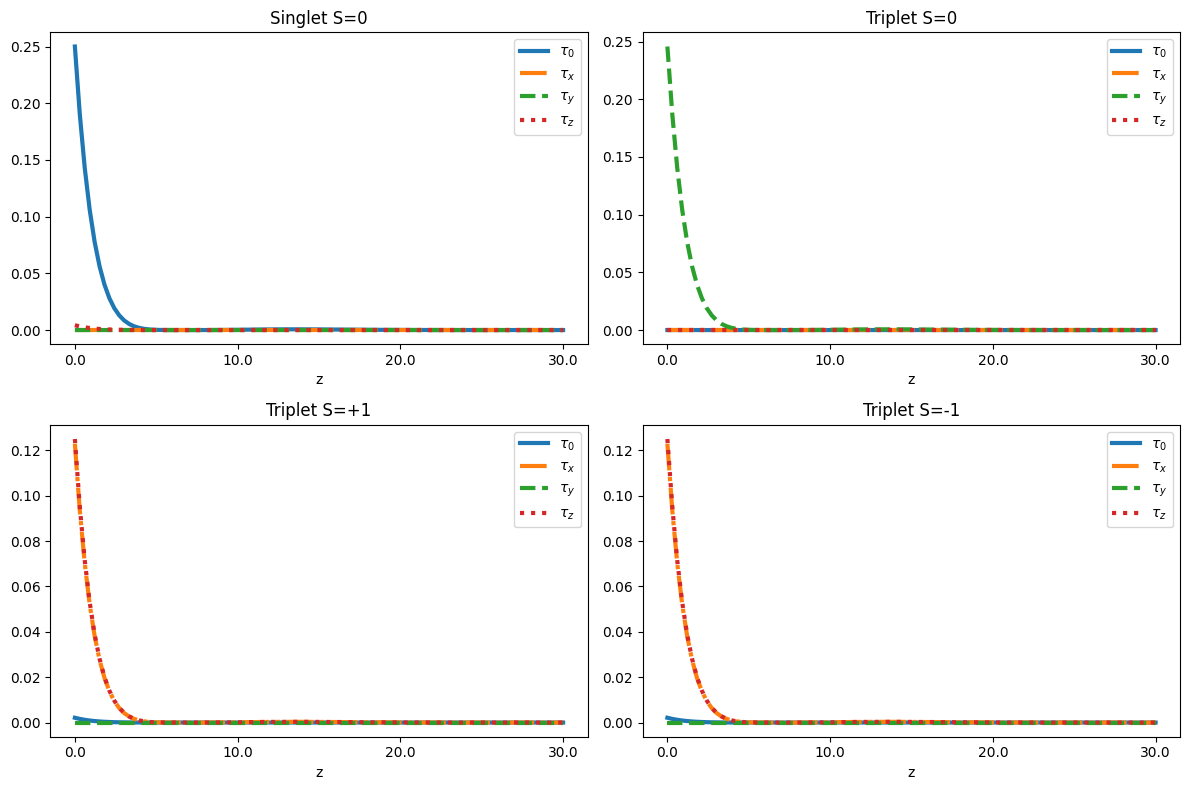

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

y_ticks = np.linspace(0, len(Z)-1, 4)
y_labels = np.linspace(Z[0], Z[-1], 4)

title = ['Singlet S=0', 'Triplet S=0', 'Triplet S=+1', 'Triplet S=-1']
label = ['$\\tau_0$', '$\\tau_x$', '$\\tau_y$', '$\\tau_z$']

lw = [5,5,4,4]
ls = ['-', '-.', '--', ':']

# normalization
norm_0 = np.sum(coeffs_avg[0])
# total weight per spin
tot_spin = np.sum(coeffs_avg, axis=2)/norm_0


# loop over row (spin states)
for row in range(4):

    # select ax
    ax = axs[row // 2, row % 2]
    
    # loop over column (orbital states)
    for col in range(4):
        # plot the coefficients
        ax.plot(coeffs_avg[:, row, col]/norm_0, lw=3, label=label[col], ls=ls[col])

    # plot total spin components
    #ax.plot(tot_spin[:,row], lw=2, c='black')   
    
    ax.set_title(title[row])
    ax.set_xlabel('z')    
    ax.legend()

    ax.set_xticks(y_ticks, y_labels);


plt.tight_layout()
plt.show()

### Effective Model Coefficients

In [9]:
# shape of the matrix 
n = 4
# space dimensions
K = []; k_dim = 100

# store data in matrices
F_model = np.empty((61, k_dim, 4, 4), dtype='complex')


# loop over all files with various Zeeman
for idx, L in enumerate(np.arange(-30, 31)):

    # select file
    filename = "Pairing/pairing_model/pairing_" + str(L) + ".txt"

    # read file pairing
    rows = np.loadtxt(filename)

    # loop over momenta
    for jdx in range(k_dim):
                
        # read one row
        row = rows[jdx]
    
        if irow == 0: K.append(float(row[0]))
    
        # real part
        real = row[1 : 1 + n*n].reshape((n, n))
        # imaginary part
        imag = row[1 + n*n :].reshape((n, n))
        # pairing matrix
        matrix = real + 1j * imag

        F_model[idx][jdx] = Change_Basis(matrix)

print(F_model.shape)

(61, 100, 4, 4)


#### <font color='green'> **Singlet-Triplet Projection** </font> 

In [10]:
c_model = np.empty(F_model.shape, dtype='complex')

# range of Zeeman
Zeeman = np.arange(-0.030, 0.0301, 0.001)

# loop over Zeeman
for idx in range(F_model.shape[0]):
    # loop over momentum 
    for jdx in range(F_model.shape[1]):
        
        F = F_model[idx, jdx]

        c_model[idx,jdx] = Project_All(F, normalize=False)

#print(Fs_0[0,0])
#print()
#print(coeffs[0,0][0])
#print()

# get the modulus squared
c_model = np.abs(c_model)**2
# average over k 
C_avg = np.sum(c_model, axis=1)

print(C_avg.shape)

(61, 4, 4)


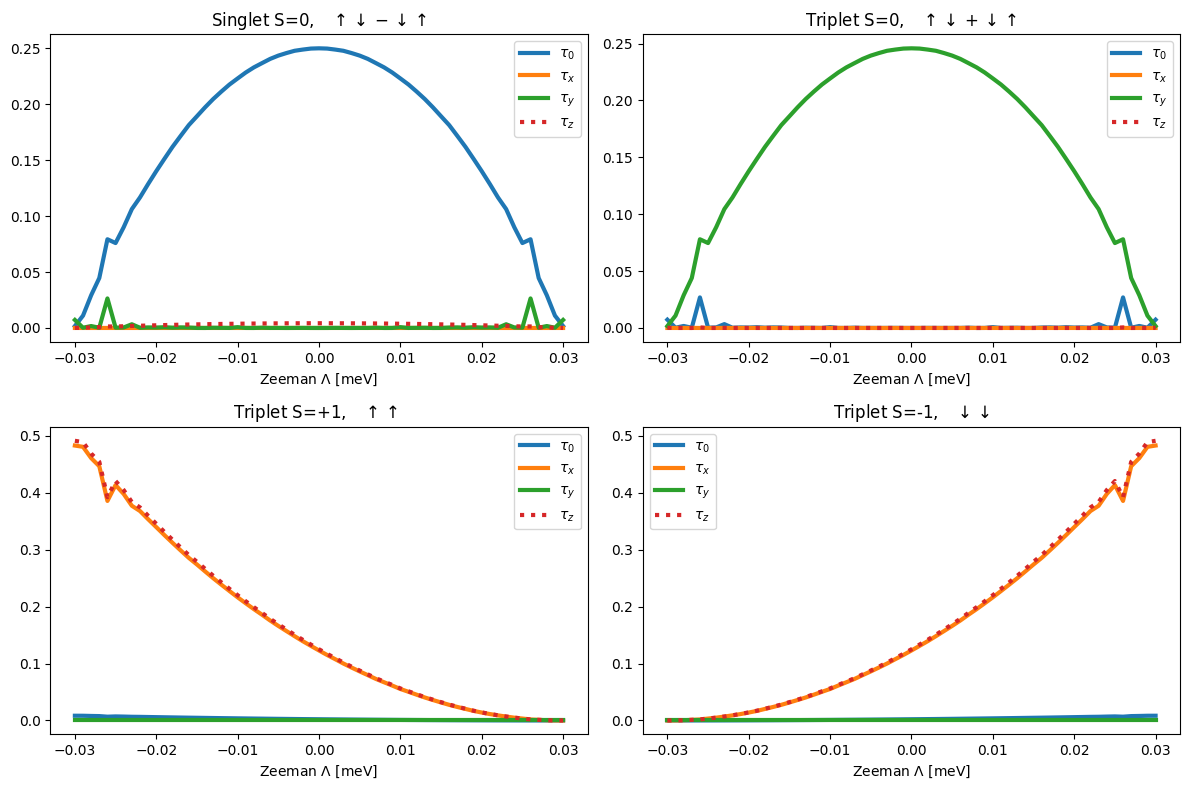

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

title = ['Singlet S=0,   $\\uparrow\\downarrow - \\downarrow\\uparrow$', 'Triplet S=0,   $\\uparrow\\downarrow + \\downarrow\\uparrow$', 'Triplet S=+1,   $\\uparrow\\uparrow$ ', 'Triplet S=-1,   $\\downarrow\\downarrow$']
label = ['$\\tau_0$', '$\\tau_x$', '$\\tau_y$', '$\\tau_z$']

lw = [5,5,4,4]
ls = ['-', '-', '-', ':']

color = ['blue', 'green', 'orange', 'red']

# normalization
norm = np.sum(C_avg, axis=(1,2))

# loop over row (spin states)
for row in range(4):

    # select ax
    ax = axs[row // 2, row % 2]
    
    # loop over column (orbital states)
    for col in range(4):
        # plot the coefficients
        ax.plot(Zeeman, C_avg[:, row, col]/norm, lw=3, label=label[col], ls=ls[col])


    
    ax.set_title(title[row])
    ax.set_xlabel('Zeeman $\Lambda$ [meV]')    
    ax.legend()


plt.tight_layout()
plt.show()